# Olympic Athletes From 1986 - 2016

<img src="7509278626_dda300c0c6_z.jpg">

Datasets used in this project: https://www.kaggle.com/the-guardian/olympic-games (GDP and Population of competing countries)

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results  (biodata on athletes and medal results from 1896-2016 Games)

In [81]:
#import libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

In [82]:
#read data into a dataframe
events = pd.read_csv('athlete_events.csv')
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## The Dataset

This table contains data on Olympic athletes from 1896-2016, including height, weight, age, sport, event(s), and medal(s) won. Data on Summer Games span from 1896-2016, while Winter Games start in 1924 and the data continues through 2016.

The events table lists all events for all athletes. One athlete might have competed in 3 events during two Games and is therefore listed 6 times. An athlete might have multiple age entries (and possibly height/weight entries, if this information changed from one Games to the next). The ID column is a unique identifier for the athlete and remains the same regardless of event or year.

## Find the proportion of entries for each year that have height and weight data

Let's see how the height and weight data is distributed over the time period (1896-2016).

In [83]:
#create table with one entry per athlete per games
no_events = events.drop(['Sport', 'Event', 'Team', 'Medal'], axis = 1)
no_events = no_events.drop_duplicates()

In [84]:
#Find the number of entries per year that have height and weight data
has_data = no_events[(np.isnan(no_events.Weight)==False)&(np.isnan(no_events.Height)==False)].groupby('Year').count()

#Find the number of athletes per year
athletes_per_year = no_events.groupby('Year').ID.count()
has_data = has_data.reset_index()
athletes_per_year = athletes_per_year.reset_index()

has_data['num_athletes'] = athletes_per_year['ID']
has_data.merge(athletes_per_year, on="Year")

#Calculate the proportion of athletes for whom there is weight data, by year
has_data['prop_data'] = has_data.Weight/has_data.num_athletes
has_data.head()

,Year,ID,Name,Sex,Age,Height,Weight,NOC,Games,Season,City,num_athletes,prop_data
0,1896,13,13,13,11,13,13,13,13,13,13,176,0.073864
1,1900,35,35,35,34,35,35,35,35,35,35,1224,0.028595
2,1904,55,55,55,52,55,55,55,55,55,55,650,0.084615
3,1906,78,78,78,77,78,78,78,78,78,78,841,0.092747
4,1908,196,196,196,187,196,196,196,196,196,196,2024,0.096838


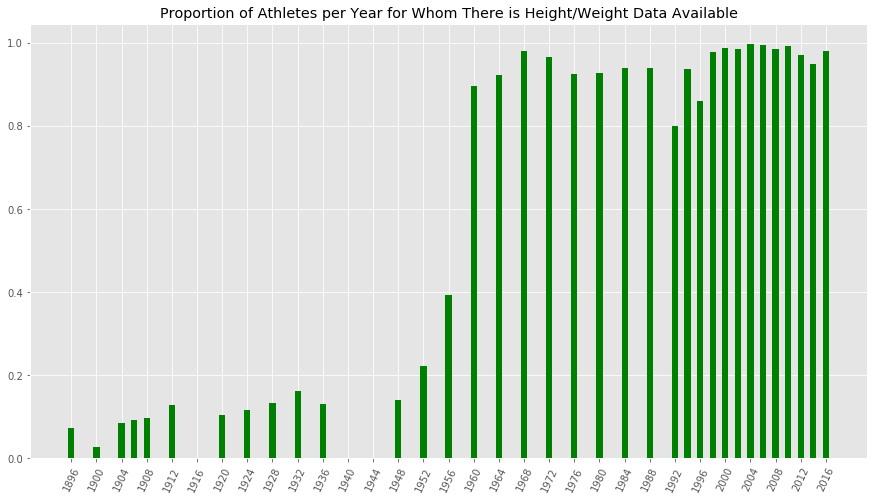

In [85]:
plt.figure(figsize=(15,8))
plt.bar(has_data.Year, has_data.prop_data, color='green', width = 1)
plt.xticks(np.arange(1896, 2020, step=4), rotation=65)
plt.title("Proportion of Athletes per Year for Whom There is Height/Weight Data Available");

The height and weight data is much more plentiful after 1960. It isn't until 1960 that there is height and weight data available for more than half of the athletes. Height and weight data is very limited for earlier years, with complete info only available for about 17% of entries for athletes in 1932 and 14% for athletes in 1928, compared to 98% for 2016 athletes.

## Create a table with one entry per athlete per Games

This will make measures of things like average height and weight per Games more accurate, as there will be one set of height and weight data per athlete per Games, rather than multiple sets in some cases.

In [86]:
no_events = events.drop(['Sport', 'Event', 'Team', 'Medal'], axis = 1)
no_events = no_events.drop_duplicates()
no_events.query('Name == "Ioan Popa"')

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City
191406,96120,Ioan Popa,M,23.0,191.0,75.0,ROU,1976 Summer,1976,Summer,Montreal
191407,96120,Ioan Popa,M,27.0,191.0,75.0,ROU,1980 Summer,1980,Summer,Moskva
191409,96121,Ioan Popa,M,31.0,171.0,66.0,ROU,1980 Summer,1980,Summer,Moskva


There should now be some duplicate names/IDs as seen above, but only if that individual took part in multiple Games

## How do summer and winter athletes compare in height and weight?

In [87]:
%%HTML

<div class='tableauPlaceholder' id='viz1537652388261' style='position: relative'><noscript><a href='#'><img alt='Average Height and Weight by Year, Season ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageHeightandWeightbyYearSeason&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AverageHeightandWeightbyYearSeason&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageHeightandWeightbyYearSeason&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1537652388261');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Summer athletes tend to weigh more and be taller than winter athletes. There's a dip in height and weight around 1960, after which height and weight climb back up to another peak in 1988/1992, then more or less level off. What about BMI, a measure of tissue mass (muscle, bone, fat) in a person based on their height and weight?

## Calculate average BMIs for each Games

In [88]:
#create a new column with BMI for each athlete
no_events['bmi'] = no_events.Weight/(no_events.Height / 100)**2

#find the averages for bmi for each game and make separate columns for winter averages 
#and summer averages, for easier plotting

summer_bmi = no_events[no_events.Season == "Summer"].groupby('Games').bmi.mean()
winter_bmi = no_events[no_events.Season == "Winter"].groupby('Games').bmi.mean()

#create dataframe with Games as the organizing variable
games = events.groupby('Games', as_index = False).count()
games['num_athletes'] = events.groupby('Games', as_index = False).ID.nunique()

#convert to dataframe then merge to join the series created above to the games table
winter_bmi = pd.DataFrame(winter_bmi)
winter_bmi = winter_bmi.reset_index()
games = games.merge(winter_bmi, on = 'Games', how = 'left')


In [89]:
games = games.rename({"bmi": "winter_bmi"}, axis = "columns")

In [90]:
summer_bmi = pd.DataFrame(summer_bmi)
summer_bmi = summer_bmi.reset_index()
games = games.merge(summer_bmi, on = 'Games', how = 'left')

In [91]:
games = games.rename({"bmi": "summer_bmi"}, axis = "columns")

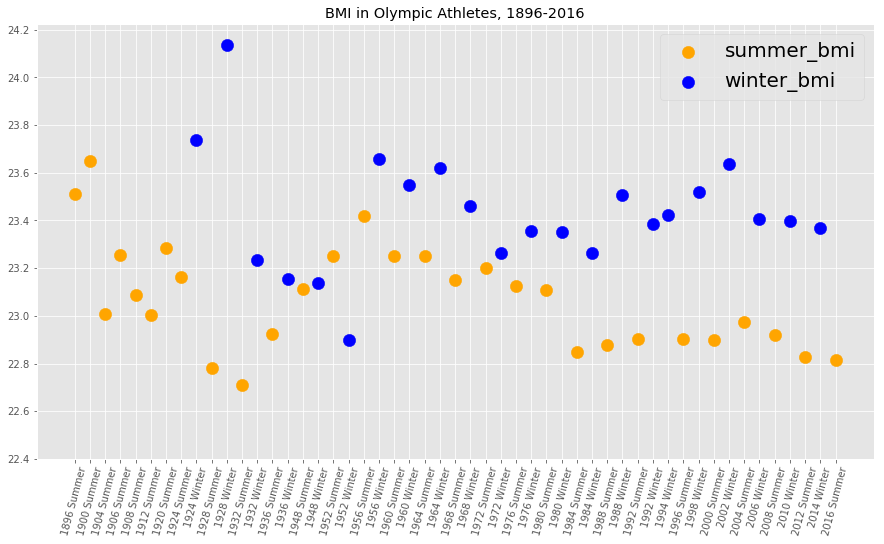

In [98]:
plt.figure(figsize=(15,8))
plt.scatter(games.Games, games.summer_bmi, s = 150, c="orange")
plt.scatter(games.Games, games.winter_bmi, s = 150, c="blue")
plt.xticks(rotation = 75)
plt.yticks(np.arange(22.4, 24.4, step=0.2))
plt.title('BMI in Olympic Athletes, 1896-2016')
plt.legend(prop={'size':20});

Though Summer athletes tend to be taller and weight more, Winter athletes tend to have higher BMIs (at least since the mid-1950s) suggesting higher muscle (or bone or fat) mass.

## Female Athletes

Let's look at the number of female athletes per Games and the percentage of female athletes per Games

In [99]:
#Find the number of female athletes per Games
num_female = events[events.Sex == "F"].groupby('Games').ID.nunique()
num_female = pd.DataFrame(num_female)
num_female = num_female.reset_index()

games = games.merge(num_female, on = "Games", how = 'left')

In [100]:
games = games.rename({"ID_y" : "num_female"}, axis = 'columns')
games = games.drop([ 'Name', 'Sex', 'Height', 'Weight', 'Team', 'NOC', 'Year','City'], axis = "columns")
games = games.drop(['ID_x', 'Age', 'Sport', 'Event', 'Medal', 'Season'], axis = "columns")

ValueError: labels ['Name' 'Sex' 'Height' 'Weight' 'Team' 'NOC' 'Year' 'City'] not contained in axis

In [109]:
games['per_female'] = games.num_female/games.num_athletes
games['season'] = games.Games.str.extract('(Summer|Winter)', expand=True)

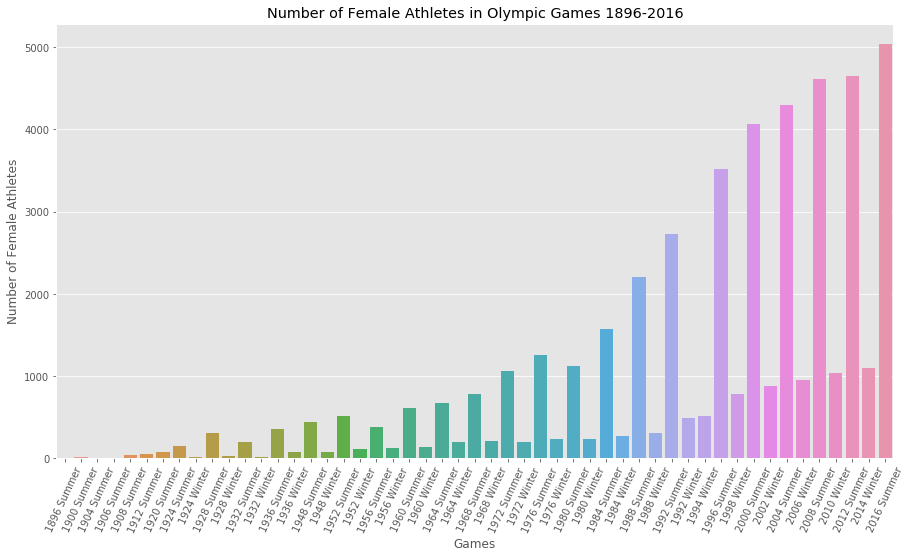

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(x="Games", y='num_female', data=games)
plt.xticks(rotation = 65, label="Games")
plt.ylabel('Number of Female Athletes')
plt.title('Number of Female Athletes in Olympic Games 1896-2016');

The number of athletes who were female climbed steadily from 0 in the Summer 1896 games to about 5,000 in Summer 2016.

In [111]:
%%HTML

<div class='tableauPlaceholder' id='viz1537649902135' style='position: relative'><noscript><a href='#'><img alt='Percentage of Athletes Who Were Female, by Games ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pe&#47;PercentageAthletesFemalebyGames&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PercentageAthletesFemalebyGames&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pe&#47;PercentageAthletesFemalebyGames&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1537649902135');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


## Athlete Age

In [116]:
mean_age = no_events.groupby('Games').Age.mean()

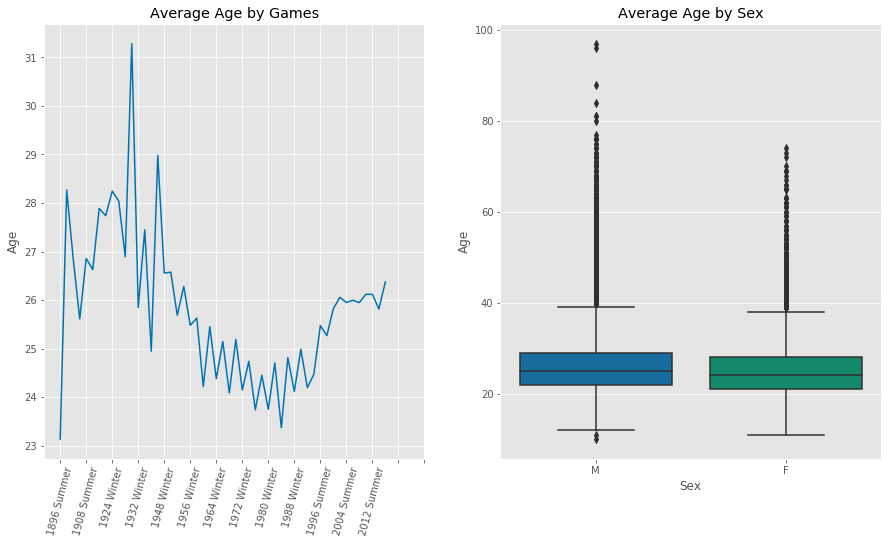

In [149]:
plt.subplots(2,2,figsize=(15,8))

plt.subplot(121)
plt.plot(mean_age)
plt.xticks(np.arange(0, 60, step = 4), rotation=75)
plt.ylabel('Age')
plt.title('Average Age by Games');

plt.subplot(122)
sns.boxplot(x=no_events.Sex, y=no_events.Age)
plt.title('Average Age by Sex');

Average age for athletes remained in the 23-29 range, except in the summer of 1932 when the average was 31.27. There were several athletes in Art Competitions that Games that were in their 30s, 40s and 50s. An athlete named John Quincy Adams Ward is listed as the oldest competitor in this dataset, who competed in Art Competitions in the summer of 1928 at the age of 97. However, a Google search reveals that the sculptor was born in 1830 and died in 1910, calling this entry into question. 

Female competitors have a few outliers in their 70s, as seen on the plot on the right.

In [120]:
max_age = no_events.Age.max()
events.query('Age==@max_age')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


## Medal Count, GDP and Population

Let's bring in another dataset that has Gross Domestic Product (GDP) per Capita and Population  figures for the countries in the Olympics dataset.

In [121]:
dictionary = pd.read_csv('dictionary.csv')
dictionary.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [123]:
#Format the medal column into three binary columns for easier tallying of medals

events = pd.get_dummies(events, columns = ['Medal'])
events.head()

ValueError: labels ['Medal'] not contained in axis

In [125]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


In [127]:
dictionary = dictionary.rename(columns = {'Code':'NOC'})

In [129]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


## Do teams from countries with higher GDP or populations win more medals?

In [130]:
country_gold = events.groupby('NOC').Medal_Gold.sum()
country_gold = pd.DataFrame(country_gold)
country_gold = country_gold.reset_index()

In [131]:
country_silver = events.groupby('NOC').Medal_Silver.sum()
country_silver = pd.DataFrame(country_silver)
country_silver = country_silver.reset_index()

In [132]:
country_bronze = events.groupby('NOC').Medal_Bronze.sum()
country_bronze = pd.DataFrame(country_bronze)
country_bronze = country_bronze.reset_index()

In [133]:
dictionary = dictionary.merge(country_gold, on = 'NOC', how = 'left' )

In [134]:
dictionary = dictionary.merge(country_silver, on = 'NOC', how = 'left' )

In [135]:
dictionary = dictionary.merge(country_bronze, on = 'NOC', how = 'left' )

In [136]:
dictionary = dictionary.rename(columns = {'GDP per Capita': 'GDP'})

In [137]:
dictionary.head()

,Country,NOC,Population,GDP,Medal_Gold,Medal_Silver,Medal_Bronze
0,Afghanistan,AFG,32526562.0,594.323081,0.0,0.0,2.0
1,Albania,ALB,2889167.0,3945.217582,0.0,0.0,0.0
2,Algeria,ALG,39666519.0,4206.031232,5.0,4.0,8.0
3,American Samoa*,ASA,55538.0,NaN,0.0,0.0,0.0
4,Andorra,AND,70473.0,NaN,0.0,0.0,0.0


In [145]:
dictionary.corr()

,Population,GDP,Medal_Gold,Medal_Silver,Medal_Bronze
Population,1.000000,-0.042539,0.245824,0.225465,0.211459
GDP,-0.042539,1.000000,0.413621,0.507065,0.518028
Medal_Gold,0.245824,0.413621,1.000000,0.957019,0.916090
Medal_Silver,0.225465,0.507065,0.957019,1.000000,0.984491
Medal_Bronze,0.211459,0.518028,0.916090,0.984491,1.000000


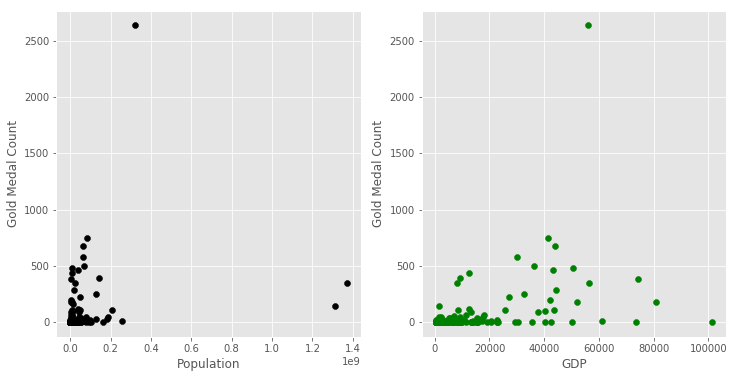

In [166]:
plt.subplots(2,2,figsize=(12,6))

plt.subplot(121)
plt.scatter(x= dictionary.Population, y = dictionary.Medal_Gold, c='black')
plt.xlabel('Population')
plt.ylabel('Gold Medal Count');

plt.subplot(122)
plt.scatter(x= dictionary.GDP, y = dictionary.Medal_Gold, c='green')
plt.xlabel('GDP')
plt.ylabel('Gold Medal Count');

In [188]:
dictionary.sort_values('Medal_Gold', ascending=False)

,Country,NOC,Population,GDP,Medal_Gold,Medal_Silver,Medal_Bronze
191,United States,USA,3.214188e+08,56115.718426,2638.0,1641.0,1358.0
70,Germany,GER,8.141314e+07,41313.313995,745.0,674.0,746.0
190,United Kingdom,GBR,6.513823e+07,43875.969614,678.0,739.0,651.0
90,Italy,ITA,6.080208e+07,29957.804315,575.0,531.0,531.0
66,France,FRA,6.680838e+07,36205.568102,501.0,610.0,666.0
174,Sweden,SWE,9.798871e+06,50579.673649,479.0,522.0,535.0
34,Canada,CAN,3.585177e+07,43248.529909,463.0,438.0,451.0
82,Hungary,HUN,9.844686e+06,12363.543460,432.0,332.0,371.0
150,Russia,RUS,1.440968e+08,9092.580536,390.0,367.0,408.0
135,Norway,NOR,5.195921e+06,74400.369777,378.0,361.0,294.0


A country's population and GDP have weak to moderate correlations to number of gold medals won. The correlation coefficient for population and gold medals is .25, while the correlation between GDP and gold medals is .41.

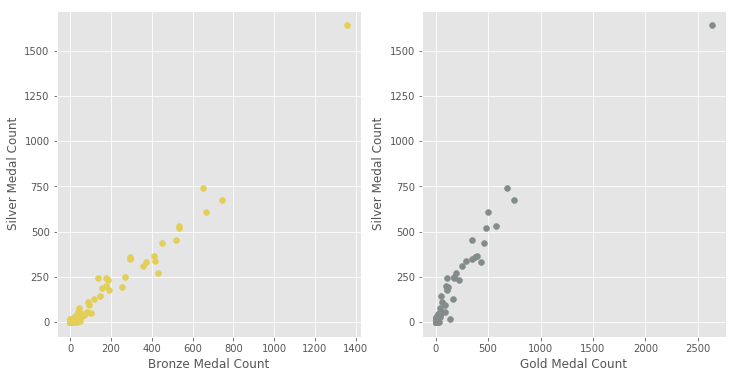

In [169]:
plt.subplots(2,2,figsize=(12,6))

plt.subplot(121)
plt.scatter(x = dictionary.Medal_Bronze, y = dictionary.Medal_Silver, c = '#E3CF57')
plt.xlabel('Bronze Medal Count')
plt.ylabel('Silver Medal Count');

plt.subplot(122)
plt.scatter(x = dictionary.Medal_Gold, y = dictionary.Medal_Silver, c='#838B8B')
plt.xlabel('Gold Medal Count')
plt.ylabel('Silver Medal Count');


While GDP and population do not seem to be strong determining factors for how well a team does at the Olympics, teams that win medals gold medals tend to win silver and bronze medals.

## What sports had the most competitors in each country?

In [170]:
#For each team and each year, find the sport with the highest number of participants
max_part = events.groupby(['Team', 'Year', 'Sport' ]).count()

In [171]:
#make this groupby object into a dataframe
max_part = pd.DataFrame(max_part)
max_part = max_part.reset_index()

In [172]:
max_part = max_part.drop(max_part.columns[4:], axis=1)

In [179]:
max_id = max_part.groupby(['Team', 'Year']).ID.max()
max_id = pd.DataFrame(max_id)
max_id = max_id.reset_index()

In [180]:
sport_year = max_id.merge(max_part, on = ['Team', 'ID', 'Year'])

In [181]:
sport_year.to_csv('sport_year.csv')

In [183]:
sport_year.head()

,Team,Year,ID,Sport
0,30. Februar,1952,2,Sailing
1,A North American Team,1900,4,Polo
2,Acipactli,1964,3,Sailing
3,Acturus,1948,2,Sailing
4,Afghanistan,1936,13,Hockey


I used this table that contains team, year, sport and number of participants for the most participated in sport per country per year to make a Tableau map visualization below. Adjust the year filter on the right to see what sport, for example, made up the largest contingent of Mexico's Olympic team in 1972. It is also interesting to see how the participating countries were limited to the US, Australia and Europe in 1896, and added new countries as time went on.

In [184]:
%%HTML

<div class='tableauPlaceholder' id='viz1540434004237' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;97&#47;97CBG93NP&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;97CBG93NP' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;97&#47;97CBG93NP&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1540434004237');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Summary

Key findings:

The Olympics used to include art competitions alongside its athletic events, and had competitors in their seventies. 

It went from being male-dominated and mostly American/European in the late 19th century, to being almost equally male and female, with competitors from nearly every country in the world. 

Russia, India, China, Brazil and Bulgaria have 4-digit GDP per capita values, but are in the top 30 of countries with the most gold medals. 

Summer athletes tend to be taller and weigh more than winter athletes, but winter athletes tend to have higher BMIs.